In [86]:
import sys
sys.path.append('d:/flagellar/code/core')
sys.path.append('/kaggle/code/core')
sys.path.append('/kaggle/input/my-flg-library/')
import flg_support as fls
import importlib
import numpy as np
import flg_diagnostics
import flg_numerics
import matplotlib.pyplot as plt
import glob
import copy
importlib.reload(fls);
fls.profiling=False

MainProcess


In [99]:
files = glob.glob(fls.result_dir + '/many_abbr_full/Baseline_*M*')
models = [fls.dill_load(f) for f in files]
models = sorted(models, key=lambda d:d.trained_model.seed)

In [ ]:
for m in models[0:1]:
    m.trained_model.step1Labels.relative_confidence_threshold = 0.001
    m.inferred_test_data = m.trained_model.infer(m.test_data)

In [104]:
fls.dill_save(fls.temp_dir + '/models_reinferred.pickle', models)

In [101]:
data = copy.deepcopy(models[0].inferred_test_data)

In [149]:
def visualize_slice(data, z_list):
    preprocessor = copy.deepcopy(models[0].trained_model.step1Labels.preprocessor)
    #preprocessor.blur_z = 9
    preprocessor.scale_moving_average = True
    preprocessor.moving_ratio = 0.05
    data = copy.deepcopy(data)
    preprocessor.load_and_preprocess(data, desired_original_slices = z_list)
    dat = []
    for mm in range(1):
        m = copy.deepcopy(models[mm].trained_model)
        m.step1Labels.preprocessor = preprocessor
        m.step1Labels.relative_confidence_threshold = 0.01
        m.step2Motors.distance_threshold = 10.
        m.run_in_parallel = False
        dat.append (m.infer([data])[0])
    for i_z,z in enumerate(data.slices_present):
    #     if data.slices_present[i_z]==z:
    #         break
    # else:
    #     raise 'stop'
        plt.figure()
        plt.imshow(data.data[i_z,:,:], cmap='bone')
        plt.colorbar()
        plt.title(data.name + ', ' + str(z))
        for d in dat:
            assert d.name == data.name
            to_plot = d.labels_unfiltered2
        
            to_plot = to_plot[to_plot['z']==z]
            print('z: ', z)
            print(to_plot)
    
            plt.scatter(to_plot['x'], to_plot['y'])
#             #print(dat)    
    # for mm in range(1):
    #     # m = copy.deepcopy(models[mm].trained_model)
    #     # m.step1Labels.relative_confidence_threshold = 0.01
    #     # m.step2Motors.distance_threshold = 10.
    #     # m.run_in_parallel = False
    #     # dat = m.infer([data])
    #     dat = models[mm].inferred_test_data
    #     for d in dat:
    #         if d.name == data.name:
    #             to_plot = d.labels_unfiltered2
            
    #             to_plot = to_plot[to_plot['z']==z]
    #             print(to_plot)
        
    #             plt.scatter(to_plot['x'], to_plot['y'])
    #             #print(dat)    

Clearing pytorch
Clearing cupy
YOLOv9s summary (fused): 197 layers, 7,167,475 parameters, 0 gradients, 26.7 GFLOPs
Processing tomogram aba2015-07-07-5 (1/1)
Processing 17 out of 17 slices (CONCENTRATION=1)
this
    index    z    y    x  confidence  i_model
0       0  300  280  343    0.490234        0
1       1  296  286  345    0.458984        0
2       3  301  285  341    0.237915        0
3       4  285  293  349    0.228882        0
4       9  288  287  346    0.049957        0
5      10  295  284  345    0.039062        0
6      12  297  286  343    0.021774        0
7      13  300  281  340    0.013687        0
8      14  291  304  341    0.012627        0
9      17  286  299  348    0.009933        0
10     18  299  282  342    0.009270        0
11     21  298  286  341    0.007637        0
12     22  299  285  340    0.007637        0
13     23  295  281  346    0.007519        0
14     25  299  280  343    0.005363        0
------
this
   index    z    y    x  confidence  i_mo

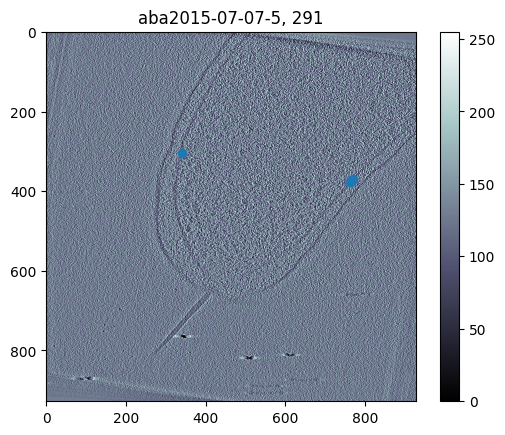

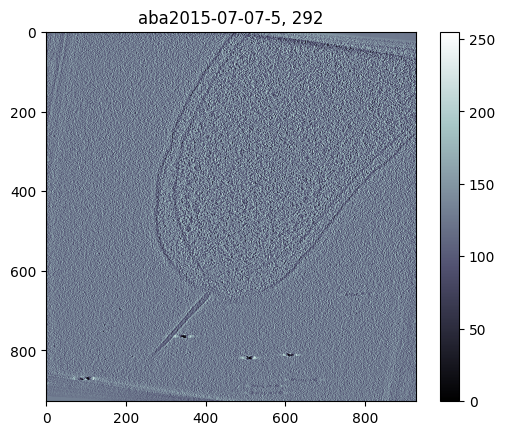

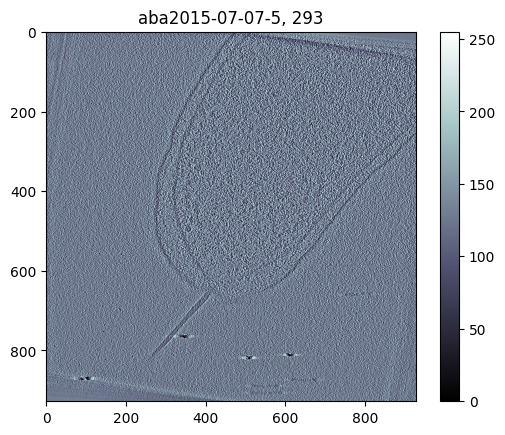

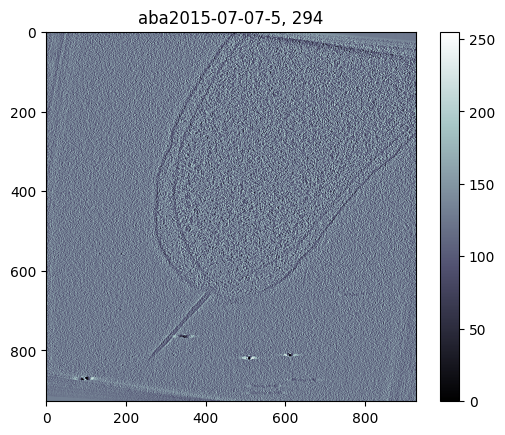

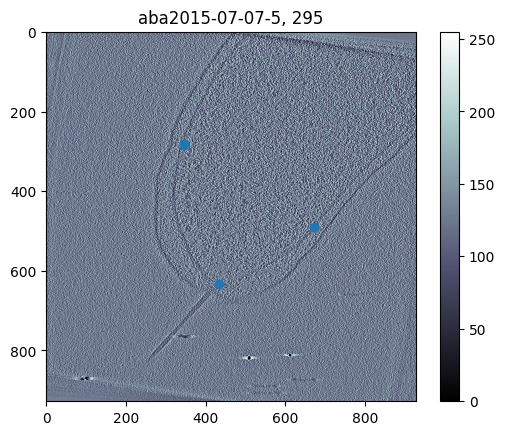

In [150]:
data[100].name
visualize_slice(data[100], list(np.arange(291,296)))

Clearing pytorch
Clearing cupy
YOLOv9s summary (fused): 197 layers, 7,167,475 parameters, 0 gradients, 26.7 GFLOPs
Processing tomogram tomo_8554af (1/1)
Processing 300 out of 300 slices (CONCENTRATION=1)
this
    index    z    y    x  confidence  i_model
0       0  101  251  546    0.842773        0
1       1   91  253  547    0.837402        0
2       2   90  253  546    0.835449        0
3       3  102  250  545    0.833496        0
4       4   89  252  546    0.832031        0
5       5   94  252  546    0.832031        0
6       6  100  251  546    0.832031        0
7       7   93  253  547    0.829102        0
8       8   92  253  547    0.827637        0
9       9   95  252  548    0.822266        0
10     10   99  251  546    0.818848        0
11     11   96  252  548    0.815430        0
12     12   98  252  546    0.813965        0
13     13   97  252  546    0.794434        0
14     21  103  250  546    0.592773        0
15     22   88  253  548    0.573730        0
16     43

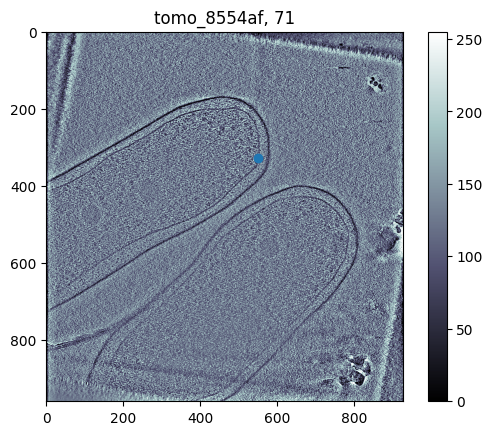

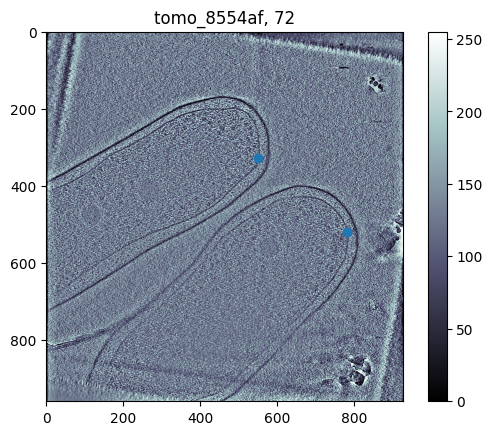

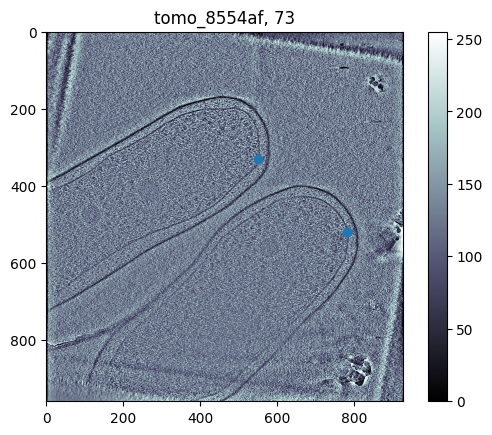

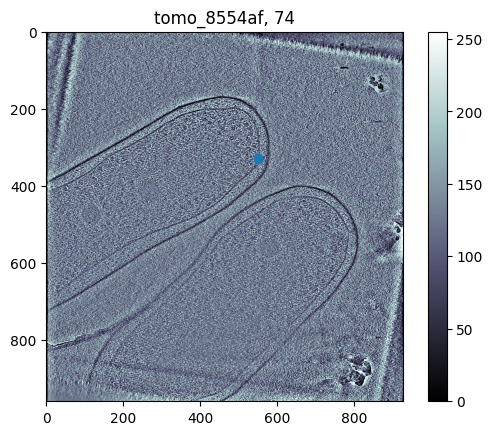

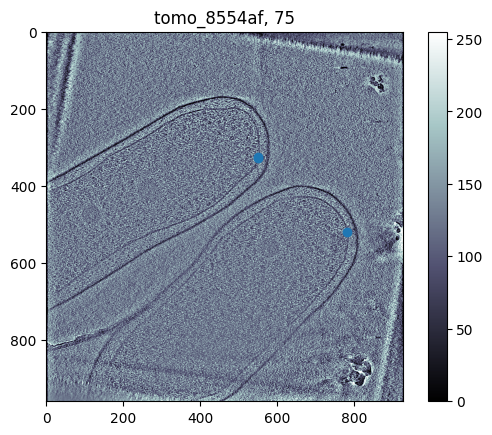

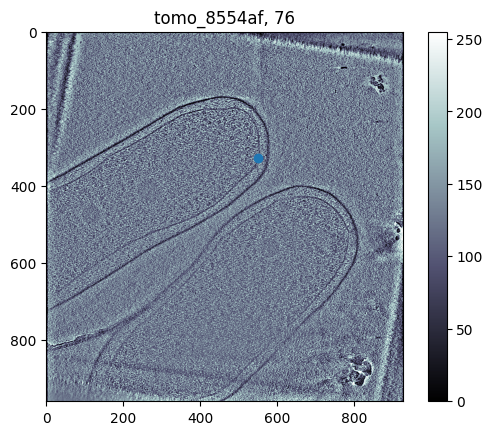

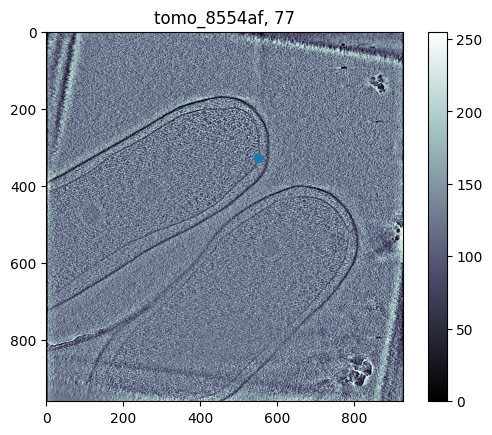

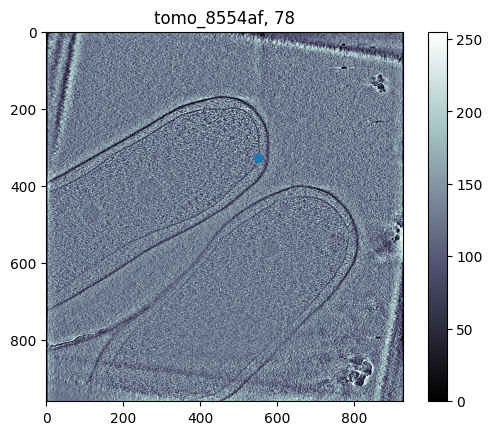

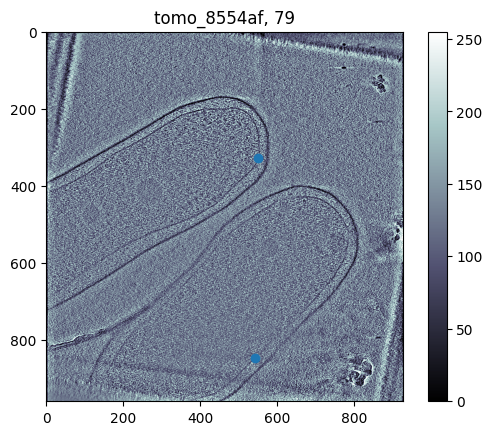

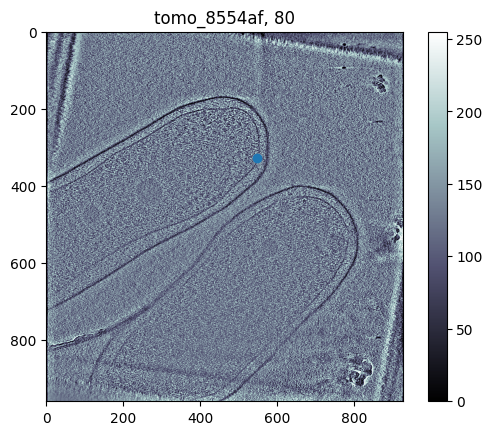

In [151]:
data[101].name
visualize_slice(data[101], list(np.arange(71,81)))

In [53]:
data[100]

DataExtra(is_train=True, name='aba2015-07-07-5', labels=   index    z    y    x  confidence     value
0      0  300  280  343    0.529297  0.529297, labels_unfiltered=     z    y    x  confidence
0  300  280  343    0.529297
1  291  373  767    0.186523, labels_unfiltered2=      z    y    x  confidence  i_model
0   285  293  350    0.294189        0
21  291  373  767    0.186523        0
40  296  286  345    0.426270        0
48  300  280  343    0.529297        0
49  301  284  341    0.340820        0, loaded_state='unloaded', data=None, data_shape=(800, 928, 928), voxel_spacing=13.236, resize_factor=1.0, slices_present=[])

In [29]:
dat = copy.deepcopy(data[100])
dat = models[0].trained_model.infer([dat])[0]
dat

Clearing cupy


DataExtra(is_train=True, name='aba2015-07-07-5', labels=   index    z    y    x  confidence     value
0      0  300  280  343    0.529297  0.529297, labels_unfiltered=     z    y    x  confidence
0  300  280  343    0.529297
1  291  373  767    0.186523, labels_unfiltered2=      z    y    x  confidence  i_model
0   285  293  350    0.294189        0
21  291  373  767    0.186523        0
40  296  286  345    0.426270        0
48  300  280  343    0.529297        0
49  301  284  341    0.340820        0, loaded_state='unloaded', data=None, data_shape=(800, 928, 928), voxel_spacing=13.236, resize_factor=1.0, slices_present=[])

In [42]:
models[0].inferred_test_data[100]

DataExtra(is_train=True, name='aba2015-07-07-5', labels=   index    z    y    x  confidence     value
0      0  300  280  343    0.529297  0.529297, labels_unfiltered=     z    y    x  confidence
0  300  280  343    0.529297
1  291  373  767    0.186523, labels_unfiltered2=      z    y    x  confidence  i_model
0   285  293  350    0.294189        0
21  291  373  767    0.186523        0
40  296  286  345    0.426270        0
48  300  280  343    0.529297        0
49  301  284  341    0.340820        0, loaded_state='unloaded', data=None, data_shape=(800, 928, 928), voxel_spacing=13.236, resize_factor=1.0, slices_present=[])

In [132]:
data[101]

DataKaggle(is_train=True, name='tomo_8554af', labels=   index    z    y    x  confidence    value
0      0  102  251  545     0.84082  0.84082, labels_unfiltered=      z    y    x  confidence
0   102  251  545    0.840820
1    75  520  782    0.747559
2    84  935  413    0.098755
3   105    5   63    0.030670
4   105  827  549    0.021484
5    37  934  124    0.014557
6   254  130  711    0.007347
7    84    4  540    0.006004
8   186   84  836    0.005260
9    32  804  780    0.004265
10    5  632  103    0.003325
11   83  446   17    0.002672
12   19  110  688    0.002388
13   74  136  855    0.002323
14   11  101  388    0.002192
15   28  243  798    0.002020
16  233  800  719    0.001484
17   55  709  837    0.001285
18   81  480  381    0.001225
19  241    5  704    0.001169
20   17  772  608    0.000970, labels_unfiltered2=         z    y    x  confidence  i_model
0        0  274  533    0.002157        0
1        0  273  538    0.001957        0
2        0  280  539    0.001839

In [133]:
for d in fls.load_all_train_data():
    if d.name == 'tomo_8554af':
        print(d)

DataKaggle(is_train=True, name='tomo_8554af', labels=    z    y    x
0  93  254  549, labels_unfiltered=Empty DataFrame
Columns: []
Index: [], labels_unfiltered2=Empty DataFrame
Columns: []
Index: [], loaded_state='unloaded', data=None, data_shape=(300, 960, 928), voxel_spacing=15.6, resize_factor=nan, slices_present=[])
